<a href="https://colab.research.google.com/github/wanadzhar913/aitinkerers-hackathon-supa-team-werecooked/blob/master/notebooks/01_dataset_prep_boolq_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets huggingface_hub -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datasets import load_dataset
from huggingface_hub import HfApi, login

import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [ ]:
# set login credentials for Huggingface
login('')

api = HfApi()

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
# load model for translations
tokenizer = T5Tokenizer.from_pretrained('mesolitica/t5-base-standard-bahasa-cased')
model = T5ForConditionalGeneration.from_pretrained('mesolitica/t5-base-standard-bahasa-cased').eval().cuda()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.86k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/803k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [ ]:
!nvidia-smi

Tue Oct 15 17:03:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   45C    P0              18W /  72W |   1129MiB / 23034MiB |     20%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 1.0 Load, explore & clean BoolQ dataset

In [ ]:
# we'll be taking the validation set only
ds = load_dataset('google/boolq', split='train')
df = ds.to_pandas()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.69M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9427 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3270 [00:00<?, ? examples/s]

In [ ]:
df.head(3)

,question,answer,passage
0,do iran and afghanistan speak the same language,True,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its ..."
1,do good samaritan laws protect those who help ...,True,Good Samaritan laws offer legal protection to ...
2,is windows movie maker part of windows essentials,True,Windows Movie Maker (formerly known as Windows...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9427 entries, 0 to 9426
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  9427 non-null   object
 1   answer    9427 non-null   bool  
 2   passage   9427 non-null   object
dtypes: bool(1), object(2)
memory usage: 156.6+ KB


In [ ]:
df.answer.value_counts(normalize=True)

,proportion
answer,
True,0.623104
False,0.376896


In [ ]:
df.iloc[0].question

'do iran and afghanistan speak the same language'

In [ ]:
df.iloc[0].passage

'Persian (/ˈpɜːrʒən, -ʃən/), also known by its endonym Farsi (فارسی fārsi (fɒːɾˈsiː) ( listen)), is one of the Western Iranian languages within the Indo-Iranian branch of the Indo-European language family. It is primarily spoken in Iran, Afghanistan (officially known as Dari since 1958), and Tajikistan (officially known as Tajiki since the Soviet era), and some other regions which historically were Persianate societies and considered part of Greater Iran. It is written in the Persian alphabet, a modified variant of the Arabic script, which itself evolved from the Aramaic alphabet.'

Before we proceed any further, it's important we ensure the *passage* column has at most 1024 tokens (due to our model only being able to take a maximum of 1024 tokens at a time). Hence, we create a function below that counts the number of tokens for every row in the *passage* column.

In [ ]:
def count_tokens(text: str):
    """Function to calculate the amount of tokens after encoding with the tokenizer."""
    return (len(tokenizer.encode(f'terjemah Inggeris ke Melayu: {text}', return_tensors = 'pt')[0]))

In [ ]:
df_ = df.copy()

df_['passage_sequence_length'] = df_['passage'].apply(lambda x: count_tokens(x))
df_['answer'] = df_['answer'].apply(lambda x: 0 if x == False else 1)
df_['language'] = 'English'

df_.head(3)

,question,answer,passage,passage_sequence_length,language
0,do iran and afghanistan speak the same language,1,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...",155,English
1,do good samaritan laws protect those who help ...,1,Good Samaritan laws offer legal protection to ...,188,English
2,is windows movie maker part of windows essentials,1,Windows Movie Maker (formerly known as Windows...,82,English


In [ ]:
df_.passage_sequence_length.describe()

,passage_sequence_length
count,9427.000000
mean,138.579506
std,75.484868
min,16.000000
25%,86.000000
50%,126.000000
75%,174.500000
max,965.000000


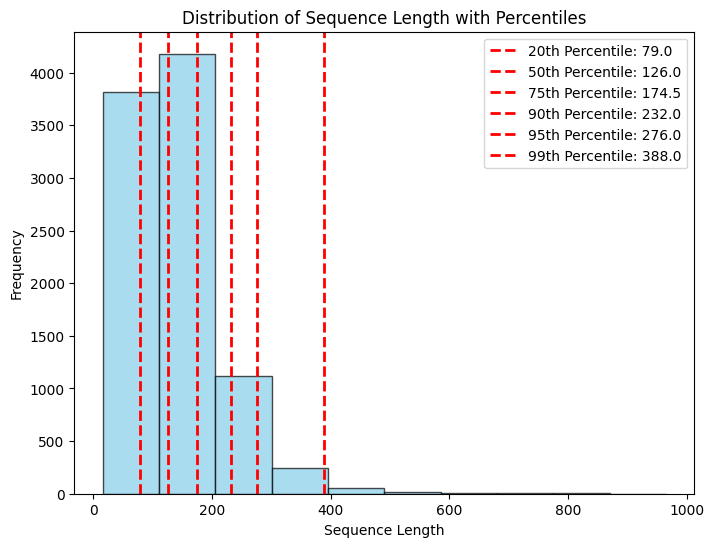

In [ ]:
# Calculate percentiles for 'passage_sequence_length'
percentiles = [0.20, 0.50, 0.75, 0.90, 0.95, 0.99]
percentile_values = df_['passage_sequence_length'].quantile(percentiles)

# Create a histogram to visualize the distribution of 'passage_sequence_length'
plt.figure(figsize=(8, 6))
plt.hist(df_['passage_sequence_length'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for the percentiles
for perc, value in zip(percentiles, percentile_values):
    plt.axvline(value, color='red', linestyle='dashed', linewidth=2, label=f'{int(perc*100)}th Percentile: {value}')

# Add labels and title
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Length with Percentiles')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# due to our context lenght limitation, we'll be dropping rows with more than 500 sequence lengths to avoid
# OOM errors
df_.query('passage_sequence_length < 965')

,question,answer,passage,passage_sequence_length,language
0,do iran and afghanistan speak the same language,1,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...",155,English
1,do good samaritan laws protect those who help ...,1,Good Samaritan laws offer legal protection to ...,188,English
2,is windows movie maker part of windows essentials,1,Windows Movie Maker (formerly known as Windows...,82,English
3,is confectionary sugar the same as powdered sugar,1,"Powdered sugar, also called confectioners' sug...",121,English
4,is elder scrolls online the same as skyrim,0,As with other games in The Elder Scrolls serie...,235,English
...,...,...,...,...,...
9422,is a us district court a federal court,1,The United States district courts are the gene...,124,English
9423,can a tenant get a restraining order against a...,1,"If a landlord is found to be retaliating, he o...",262,English
9424,is the golden state warriors in the playoffs,1,The Warriors went into the 2018 playoffs as th...,178,English
9425,downton abbey will there be a season 7,0,Downton Abbey is a British period drama televi...,149,English


In [ ]:
df_final = df_.query('passage_sequence_length < 965').copy()

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9426 entries, 0 to 9426
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   question                 9426 non-null   object
 1   answer                   9426 non-null   int64 
 2   passage                  9426 non-null   object
 3   passage_sequence_length  9426 non-null   int64 
 4   language                 9426 non-null   object
dtypes: int64(2), object(3)
memory usage: 441.8+ KB


### 2.0 Generate Malay translated rows for dataset

In [ ]:
df_final.passage.loc[0]

'Persian (/ˈpɜːrʒən, -ʃən/), also known by its endonym Farsi (فارسی fārsi (fɒːɾˈsiː) ( listen)), is one of the Western Iranian languages within the Indo-Iranian branch of the Indo-European language family. It is primarily spoken in Iran, Afghanistan (officially known as Dari since 1958), and Tajikistan (officially known as Tajiki since the Soviet era), and some other regions which historically were Persianate societies and considered part of Greater Iran. It is written in the Persian alphabet, a modified variant of the Arabic script, which itself evolved from the Aramaic alphabet.'

In [ ]:
# Let's translate one sample and compare with the English translation above.
input_ids = tokenizer.encode(f'terjemah Inggeris ke Melayu: {df_final.passage.loc[0]}', return_tensors = 'pt').cuda()
outputs = model.generate(input_ids, max_length = 4096)
all_special_ids = [0, 1, 2]
outputs = [i for i in outputs[0] if i not in all_special_ids]
tokenizer.decode(outputs, spaces_between_special_tokens = False)

'Bahasa Parsi (/prn, -n/), juga dikenali dengan nama endonimnya Farsi (frsi (fsi) (dengar)), adalah salah satu bahasa Iran Barat dalam cabang Indo-Iran dari keluarga bahasa Indo-Eropah. Ia terutamanya dituturkan di Iran, Afghanistan (secara rasmi dikenali sebagai Dari sejak 1958), dan Tajikistan (secara rasmi dikenali sebagai Tajiki sejak zaman Soviet), dan beberapa kawasan lain yang secara historis merupakan masyarakat Parsi dan dianggap sebagai sebahagian daripada Iran Besar. Ia ditulis dalam abjad Parsi, varian yang diubah suai dari skrip Arab, yang sendiri berkembang dari abjad Aramia.'

In [ ]:
# to take advantage of batch processing on GPU's, we save everything in lists first
question_en = df_final['question'].to_list()
passage_en = df_final['passage'].to_list()
target = df_final['answer'].to_list()

In [ ]:
passage_my = []
batch_size = 40

with torch.no_grad():

    for i in tqdm(range(0, len(passage_en), batch_size)):
        batch = passage_en[i:i+batch_size]
        encodeds = [f'terjemah Inggeris ke Melayu: {row}' for row in batch]

        model_inputs = tokenizer(
            encodeds,
            padding=True,
            truncation=True, # https://huggingface.co/docs/transformers/en/pad_truncation
            max_length=1024, # https://huggingface.co/mesolitica/translation-t5-base-standard-bahasa-cased/blob/main/config.json
            return_tensors="pt",
        ).to('cuda')

        generated_ids = model.generate(**model_inputs, max_length = 8192)
        decoded = tokenizer.batch_decode(
            generated_ids,
            spaces_between_special_tokens=True,
            skip_special_tokens=True
        )

        for output in decoded:
            passage_my.append(output)

  0%|          | 0/236 [00:00<?, ?it/s]

In [ ]:
question_my = []
batch_size = 20

with torch.no_grad():

    for i in tqdm(range(0, len(question_en), batch_size)):
        batch = question_en[i:i+batch_size]
        encodeds = [f'terjemah Inggeris ke Melayu: {row}' for row in batch]

        model_inputs = tokenizer(
            encodeds,
            padding=True,
            truncation=True,
            max_length=1024,
            return_tensors="pt",
        ).to('cuda')

        generated_ids = model.generate(**model_inputs, max_length = 4096)
        decoded = tokenizer.batch_decode(
            generated_ids,
            spaces_between_special_tokens=True,
            skip_special_tokens=True
        )

        for output in decoded:
            question_my.append(output)

  0%|          | 0/472 [00:00<?, ?it/s]

In [ ]:
df_malay = pd.DataFrame({
    'passage': passage_my,
    'question': question_my,
    'answer': target,
    'language': 'Malay',
})

df_malay.head(3)

,passage,question,answer,language
0,"Bahasa Parsi (/prn, -n/), juga dikenali dengan...",adakah iran dan afghanistan bertutur dalam bah...,1,Malay
1,Undang-undang Samaria yang baik menawarkan per...,lakukan undang-undang samawi yang baik melindu...,1,Malay
2,Windows Movie Maker (dahulunya dikenali sebaga...,adalah pembuat filem tingkap sebahagian daripa...,1,Malay


In [ ]:
df_both = pd.concat([df_malay, df_final[['passage', 'question', 'answer', 'language']]], axis=0)

print(f'Num. rows in final dataset: {len(df_both)}')
df_both.head(3)

Num. rows in final dataset: 18852


,passage,question,answer,language
0,"Bahasa Parsi (/prn, -n/), juga dikenali dengan...",adakah iran dan afghanistan bertutur dalam bah...,1,Malay
1,Undang-undang Samaria yang baik menawarkan per...,lakukan undang-undang samawi yang baik melindu...,1,Malay
2,Windows Movie Maker (dahulunya dikenali sebaga...,adalah pembuat filem tingkap sebahagian daripa...,1,Malay


In [ ]:
df_both['split'] = 'train'

df_both.to_json('./datasets/boolq-train.jsonl', orient='records', lines=True)

### 3.0 Upload to Huggingface

In [ ]:
df_both.columns

Index(['passage', 'question', 'answer', 'language', 'split'], dtype='object')

In [ ]:
file_name = './datasets/boolq-train.jsonl'

In [ ]:
api.upload_file(
    path_or_fileobj=file_name,
    path_in_repo=file_name.split("/")[2],
    repo_id="wanadzhar913/boolq-malay",
    repo_type="dataset",
)

boolq-train.jsonl:   0%|          | 0.00/13.3M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/wanadzhar913/boolq-malay/commit/14d33bedfff8f8d2d26a8c7b56c9d1e29c5d5351', commit_message='Upload boolq-train.jsonl with huggingface_hub', commit_description='', oid='14d33bedfff8f8d2d26a8c7b56c9d1e29c5d5351', pr_url=None, pr_revision=None, pr_num=None)